## Análise de Bolsas de Pós Graduação Academica Concedidas Pelo CAPES

## Bibliotecas

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Carregando e Visualizando a Base de Dados

In [35]:
# Carregando o dataset
dataset = pd.read_csv('./dados/capes-bolsas-dataset.csv')

# Visualizando as 3 primeiras linhas
dataset.head(3)

,Ano,UF,Município,Região,Código Programa,Programa Fomento,IES,Status Jurídico,Programa,Área Avaliação,...,JOVENS TALENTOS - A,JOVENS TALENTOS - B,MESTRADO,MESTRADO PROFISSIONAL,PESQUISADOR VISITANTE ESPECIAL,PROF VISITANTE NACIONAL SÊNIOR,PROFESSOR VISITANTE EXTERIOR PLENO,PROFESSOR VISITANTE EXTERIOR SENIOR,PÓS-DOUTORADO,Total Linha
0,2020,AC,RIO BRANCO,NORTE,10001018002P1,PROCAD-AM,UFAC,Federal,BIOLOGIA EXPERIMENTAL,CIÊNCIAS BIOLÓGICAS III ...,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,2020,AC,RIO BRANCO,NORTE,11001011001P8,DS,UFAC,Federal,ECOLOGIA E MANEJO DE RECURSOS NATURAIS,BIODIVERSIDADE ...,...,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,9
2,2020,AC,RIO BRANCO,NORTE,11001011001P8,PNPD,UFAC,Federal,ECOLOGIA E MANEJO DE RECURSOS NATURAIS,BIODIVERSIDADE ...,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [36]:
# Visualizando as 3 últimas linhas
dataset.tail(3)

,Ano,UF,Município,Região,Código Programa,Programa Fomento,IES,Status Jurídico,Programa,Área Avaliação,...,JOVENS TALENTOS - A,JOVENS TALENTOS - B,MESTRADO,MESTRADO PROFISSIONAL,PESQUISADOR VISITANTE ESPECIAL,PROF VISITANTE NACIONAL SÊNIOR,PROFESSOR VISITANTE EXTERIOR PLENO,PROFESSOR VISITANTE EXTERIOR SENIOR,PÓS-DOUTORADO,Total Linha
154913,1995,SP,SÃO PAULO,SUDESTE,33019010006P4,DS,FCMSCSP-TI,Privada,MEDICINA (PEDIATRIA),MEDICINA II ...,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,12
154914,1995,SP,SÃO PAULO,SUDESTE,33019010007P0,DS,FCMSCSP-TI,Privada,MEDICINA (OTORRINOLARINGOLOGIA),MEDICINA III ...,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,5
154915,1995,SP,SÃO PAULO,SUDESTE,33038015003P2,DS,IAMSPE,Estadual,MEDICINA (GASTROENTEROLOGIA CIRÚRGICA),MEDICINA III ...,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,5


In [37]:
# Colunas do dataset
dataset.columns

Index(['Ano', 'UF', 'Município', 'Região', 'Código Programa',
       'Programa Fomento', 'IES', 'Status Jurídico', 'Programa',
       'Área Avaliação', 'Área Conhecimento', 'Grande Área', 'Codigo IES',
       'DOUTORADO PLENO', 'DOUTORADO PROFFISIONAL', 'Iniciação Científica',
       'JOVENS TALENTOS - A', 'JOVENS TALENTOS - B', 'MESTRADO',
       'MESTRADO PROFISSIONAL', 'PESQUISADOR VISITANTE ESPECIAL',
       'PROF VISITANTE NACIONAL SÊNIOR', 'PROFESSOR VISITANTE EXTERIOR PLENO',
       'PROFESSOR VISITANTE EXTERIOR SENIOR', 'PÓS-DOUTORADO', 'Total Linha'],
      dtype='object')

In [38]:
# Informações da base
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154916 entries, 0 to 154915
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Ano                                  154916 non-null  int64  
 1   UF                                   154916 non-null  object 
 2   Município                            154916 non-null  object 
 3   Região                               154916 non-null  object 
 4   Código Programa                      148312 non-null  object 
 5   Programa Fomento                     154916 non-null  object 
 6   IES                                  154915 non-null  object 
 7   Status Jurídico                      154916 non-null  object 
 8   Programa                             148312 non-null  object 
 9   Área Avaliação                       154916 non-null  object 
 10  Área Conhecimento                    154916 non-null  object 
 11  Grande Área  

In [39]:
# Dimensões do dataset
dataset.shape

(154916, 26)

In [40]:
# Verificando dados nulos
dataset.isnull().sum()

Ano                                         0
UF                                          0
Município                                   0
Região                                      0
Código Programa                          6604
Programa Fomento                            0
IES                                         1
Status Jurídico                             0
Programa                                 6604
Área Avaliação                              0
Área Conhecimento                           0
Grande Área                                 0
Codigo IES                             125450
DOUTORADO PLENO                             0
DOUTORADO PROFFISIONAL                 146111
Iniciação Científica                    75191
JOVENS TALENTOS - A                    125450
JOVENS TALENTOS - B                    125450
MESTRADO                                    0
MESTRADO PROFISSIONAL                   59026
PESQUISADOR VISITANTE ESPECIAL         125450
PROF VISITANTE NACIONAL SÊNIOR    

## Tratamento da Base

In [41]:
# Seleção das variáveis para análise
colunas = ['Ano', 'UF', 'Município', 'Região', 'Status Jurídico','Grande Área',
           'DOUTORADO PLENO', 'MESTRADO', 'PÓS-DOUTORADO']
base_tratada = dataset[colunas]

In [42]:
# Visualizando a base tratada
base_tratada.head(3)

,Ano,UF,Município,Região,Status Jurídico,Grande Área,DOUTORADO PLENO,MESTRADO,PÓS-DOUTORADO
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0.0
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0


In [43]:
# Renomeando as variáveis
colunas_renomeadas = ['Ano', 'UF', 'Municipio', 'Regiao', 'Tipo', 'Area', 'Doutorado', 'Mestrado', 'PosDoc']
base_tratada.columns = colunas_renomeadas

In [44]:
# Visualizando alteração
base_tratada.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0.0
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0


In [45]:
# Verificando nulos na variável 'PosDoc'
base_tratada['PosDoc'] = base_tratada['PosDoc'].fillna(0)

# Visualizando
base_tratada.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0.0
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1.0


In [46]:
# Mudando o tipo da variável PosDoc
base_tratada['PosDoc'] = base_tratada['PosDoc'].astype(int)

# Visualizando base
base_tratada.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1


In [47]:
# Informações do dataset tratado
base_tratada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154916 entries, 0 to 154915
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Ano        154916 non-null  int64 
 1   UF         154916 non-null  object
 2   Municipio  154916 non-null  object
 3   Regiao     154916 non-null  object
 4   Tipo       154916 non-null  object
 5   Area       154916 non-null  object
 6   Doutorado  154916 non-null  int64 
 7   Mestrado   154916 non-null  int64 
 8   PosDoc     154916 non-null  int32 
dtypes: int32(1), int64(3), object(5)
memory usage: 10.0+ MB


In [48]:
# Criando coluna total
base_tratada['Total'] = base_tratada[['Doutorado', 'Mestrado', 'PosDoc']].sum(axis=1)
base_tratada.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total
0,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1,1
1,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,9,0,9
2,2020,AC,RIO BRANCO,NORTE,Federal,CIÊNCIAS BIOLÓGICAS ...,0,0,1,1


In [49]:
# Ordenando base
base_tratada = base_tratada.sort_values('Ano')

# Visualizando 
base_tratada.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total
154915,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS DA SAÚDE ...,0,5,0,5
153759,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA ...,1,1,0,2
153760,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS BIOLÓGICAS ...,18,29,0,47


In [50]:
# Verificando dados da variável Area
base_tratada['Area'].unique()

array(['CIÊNCIAS DA SAÚDE                                           ',
       'CIÊNCIAS EXATAS E DA TERRA                                  ',
       'CIÊNCIAS BIOLÓGICAS                                         ',
       'MULTIDISCIPLINAR                                            ',
       'CIÊNCIAS HUMANAS                                            ',
       'CIÊNCIAS SOCIAIS APLICADAS                                  ',
       'CIÊNCIAS AGRÁRIAS                                           ',
       'ENGENHARIAS                                                 ',
       'LINGÜÍSTICA, LETRAS E ARTES                                 ',
       'Grande Area Não Informada                                   '],
      dtype=object)

In [51]:
# Removendo espaços a direita
base_tratada['Area'] = base_tratada['Area'].apply(lambda x: x.strip(), 1)

In [52]:
# Verificando tranformação
base_tratada['Area'].unique()

array(['CIÊNCIAS DA SAÚDE', 'CIÊNCIAS EXATAS E DA TERRA',
       'CIÊNCIAS BIOLÓGICAS', 'MULTIDISCIPLINAR', 'CIÊNCIAS HUMANAS',
       'CIÊNCIAS SOCIAIS APLICADAS', 'CIÊNCIAS AGRÁRIAS', 'ENGENHARIAS',
       'LINGÜÍSTICA, LETRAS E ARTES', 'Grande Area Não Informada'],
      dtype=object)

In [53]:
# Criando categoria Biologicas
lista_biologicas = ['CIÊNCIAS DA SAÚDE', 'CIÊNCIAS BIOLÓGICAS', 'CIÊNCIAS AGRÁRIAS']
base_tratada.loc[base_tratada['Area'].isin(lista_biologicas), 'Categoria'] = 'Biologicas'
base_tratada.loc[base_tratada['Categoria'] == 'Biologicas']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
154915,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS DA SAÚDE,0,5,0,5,Biologicas
153760,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS BIOLÓGICAS,18,29,0,47,Biologicas
153761,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS BIOLÓGICAS,6,1,0,7,Biologicas
153764,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS BIOLÓGICAS,0,11,0,11,Biologicas
153765,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS BIOLÓGICAS,0,3,0,3,Biologicas
...,...,...,...,...,...,...,...,...,...,...,...
5876,2020,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS AGRÁRIAS,0,0,1,1,Biologicas
5875,2020,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS AGRÁRIAS,12,5,0,17,Biologicas
5847,2020,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS DA SAÚDE,0,0,1,1,Biologicas
5869,2020,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS DA SAÚDE,0,0,2,2,Biologicas


In [54]:
# Criando categoria Humanas
lista_humanas = ['CIÊNCIAS SOCIAIS APLICADAS', 'CIÊNCIAS HUMANAS', 'LINGÜÍSTICA, LETRAS E ARTES']
base_tratada.loc[base_tratada['Area'].isin(lista_humanas), 'Categoria'] = 'Humanas'
base_tratada.loc[base_tratada['Categoria'] == 'Humanas']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
153771,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS HUMANAS,6,14,0,20,Humanas
153772,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS HUMANAS,1,0,0,1,Humanas
153773,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS HUMANAS,12,14,0,26,Humanas
153774,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS HUMANAS,5,0,0,5,Humanas
153775,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS HUMANAS,16,10,0,26,Humanas
...,...,...,...,...,...,...,...,...,...,...,...
5871,2020,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS SOCIAIS APLICADAS,1,0,0,1,Humanas
5870,2020,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS SOCIAIS APLICADAS,15,27,0,42,Humanas
5868,2020,RS,PORTO ALEGRE,SUL,Federal,"LINGÜÍSTICA, LETRAS E ARTES",0,0,1,1,Humanas
5867,2020,RS,PORTO ALEGRE,SUL,Federal,"LINGÜÍSTICA, LETRAS E ARTES",2,0,0,2,Humanas


In [55]:
# Criando categoria Exatas
lista_exatas = ['CIÊNCIAS EXATAS E DA TERRA', 'ENGENHARIAS']
base_tratada.loc[base_tratada['Area'].isin(lista_exatas), 'Categoria'] = 'Exatas'
base_tratada.loc[base_tratada['Categoria'] == 'Exatas']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
153759,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA,1,1,0,2,Exatas
153758,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA,0,12,0,12,Exatas
153757,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA,4,4,0,8,Exatas
153756,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA,2,0,0,2,Exatas
153755,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA,12,5,0,17,Exatas
...,...,...,...,...,...,...,...,...,...,...,...
5898,2020,RS,PORTO ALEGRE,SUL,Federal,ENGENHARIAS,16,10,0,26,Exatas
5901,2020,RS,PORTO ALEGRE,SUL,Federal,CIÊNCIAS EXATAS E DA TERRA,0,4,0,4,Exatas
5899,2020,RS,PORTO ALEGRE,SUL,Federal,ENGENHARIAS,0,0,1,1,Exatas
5858,2020,RS,PORTO ALEGRE,SUL,Federal,ENGENHARIAS,17,16,0,33,Exatas


In [56]:
# Criando categoria Multidisciplinar
lista = ['MULTIDISCIPLINAR']
base_tratada.loc[base_tratada['Area'].isin(lista), 'Categoria'] = 'Multidisciplinar'
base_tratada.loc[base_tratada['Categoria'] == 'Multidisciplinar']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
153762,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,MULTIDISCIPLINAR,17,17,0,34,Multidisciplinar
153763,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,MULTIDISCIPLINAR,2,0,0,2,Multidisciplinar
153644,1995,PE,RECIFE,NORDESTE,Federal,MULTIDISCIPLINAR,0,13,0,13,Multidisciplinar
153688,1995,PR,CURITIBA,SUL,Federal,MULTIDISCIPLINAR,4,0,0,4,Multidisciplinar
153984,1995,RS,CAXIAS DO SUL,SUL,Privada,MULTIDISCIPLINAR,0,8,0,8,Multidisciplinar
...,...,...,...,...,...,...,...,...,...,...,...
5864,2020,RS,PORTO ALEGRE,SUL,Federal,MULTIDISCIPLINAR,0,0,1,1,Multidisciplinar
5865,2020,RS,PORTO ALEGRE,SUL,Federal,MULTIDISCIPLINAR,14,7,0,21,Multidisciplinar
5874,2020,RS,PORTO ALEGRE,SUL,Federal,MULTIDISCIPLINAR,1,0,0,1,Multidisciplinar
5873,2020,RS,PORTO ALEGRE,SUL,Federal,MULTIDISCIPLINAR,0,0,4,4,Multidisciplinar


In [57]:
# Removendo linhas de áreas não informadas
base_tratada = base_tratada.loc[base_tratada['Area'] != 'Grande Area Não Informada']

# Conferindo tratamento
base_tratada.loc[base_tratada['Area'] == 'Grande Area Não Informada']

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria


In [58]:
# Dimensões do dataset tratado
base_tratada.shape

(148421, 11)

## Análise Exploratória dos Dados (AED)

## Hipóteses

1. O número de bolsas concedidas pela Capes aumentou ao longo dos anos?
2. A distribuição de bolsas varia significativamente entre as grandes áreas de estudo?
3. A distribuição de bolsas é desigual entre as regiões geográficas do país?
4. O status jurídico que disponibiliza o maior número de bolsas é o Federal?
5. Pesquisas relacionadas à ciências humanas recebem mais concessão de bolsas?
6. A quantidade de bolsas diminui conforme aumenta o nível acadêmico?
7. No período analisado, a área com maior quantidade de bolsas se manteve durante os anos?
8. A quantidade de bolsas para Mestrado são maiores que para Doutorado e Pós-Doutorado?

In [59]:
# Base de dados
dados = base_tratada.copy()

# Visualizando
dados.head(3)

,Ano,UF,Municipio,Regiao,Tipo,Area,Doutorado,Mestrado,PosDoc,Total,Categoria
154915,1995,SP,SÃO PAULO,SUDESTE,Estadual,CIÊNCIAS DA SAÚDE,0,5,0,5,Biologicas
153759,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS EXATAS E DA TERRA,1,1,0,2,Exatas
153760,1995,RJ,RIO DE JANEIRO,SUDESTE,Federal,CIÊNCIAS BIOLÓGICAS,18,29,0,47,Biologicas


## 1. O número de bolsas concedidas pela Capes aumentou ao longo dos anos

O gráfico abaixo demonstra um notável aumento no número de bolsas concedidas pelo CAPES no período de 1995 a 2020, com particular destaque para o intervalo de 2006 a 2014. Nesse período específico, houve um notável crescimento acentuado no número de bolsas, evidenciando um impulso significativo na área de ciências nas universidades. Além disso, é digno de nota que entre 2006 e 2010 houve um aumento substancial no investimento em pesquisa científica, seguido pela implantação dos Institutos Federais (IF) a partir de 2010, o que impulsionou ainda mais projetos e pesquisas em diversas áreas, incluindo ciências biológicas e tecnologia.

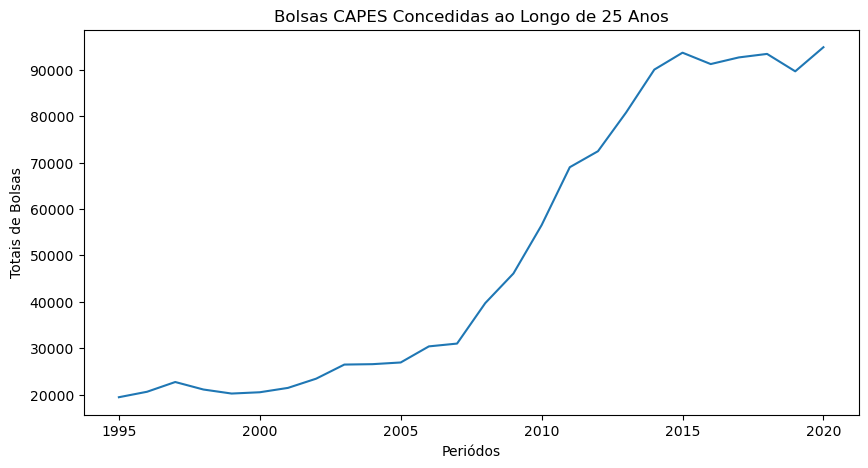

In [60]:
df = dados.groupby('Ano')['Total'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(df, x='Ano', y='Total')
plt.xlabel('Periódos')
plt.ylabel('Totais de Bolsas')
plt.title('Bolsas CAPES Concedidas ao Longo de 25 Anos')
plt.show()

## 2. A distribuição de bolsas varia significativamente entre as grandes áreas de estudo

As ciências biológicas, que englobam tanto a biologia quanto a saúde, recebem um financiamento significativamente maior do programa, dada a necessidade de avançar em pesquisas nessa área. O Brasil possui uma vasta diversidade biológica com inúmeras aplicações, especialmente no contexto da saúde nacional. Em seguida, temos as ciências humanas e as exatas.

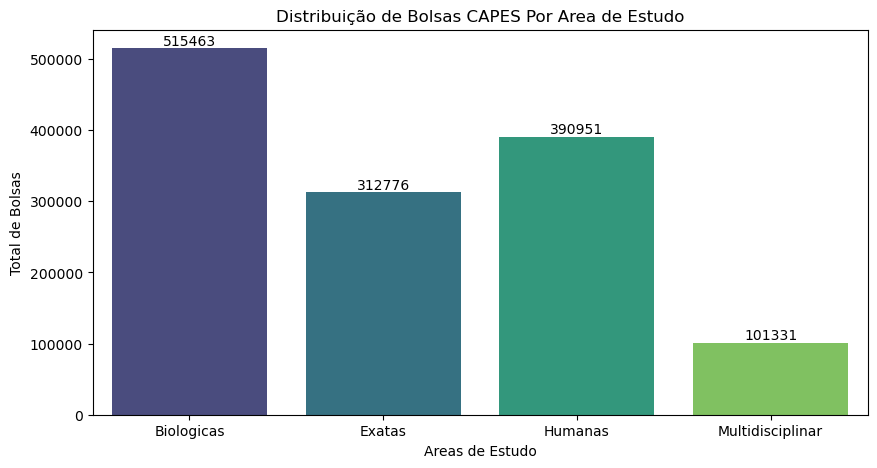

In [61]:
df = dados.groupby('Categoria')['Total'].sum().reset_index()
plt.figure(figsize=(10,5))
ax = sns.barplot(df, x='Categoria', y='Total', palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Areas de Estudo')
plt.ylabel('Total de Bolsas')
plt.title('Distribuição de Bolsas CAPES Por Area de Estudo')
plt.show()

## 3. A distribuição de bolsas é desigual entre as regiões geográficas do país

A predominância das bolsas está na região Sudeste, devido à elevada quantidade de universidades nos estados de São Paulo e Rio de Janeiro. Em seguida, vem a região Sul, seguida pela região Nordeste.

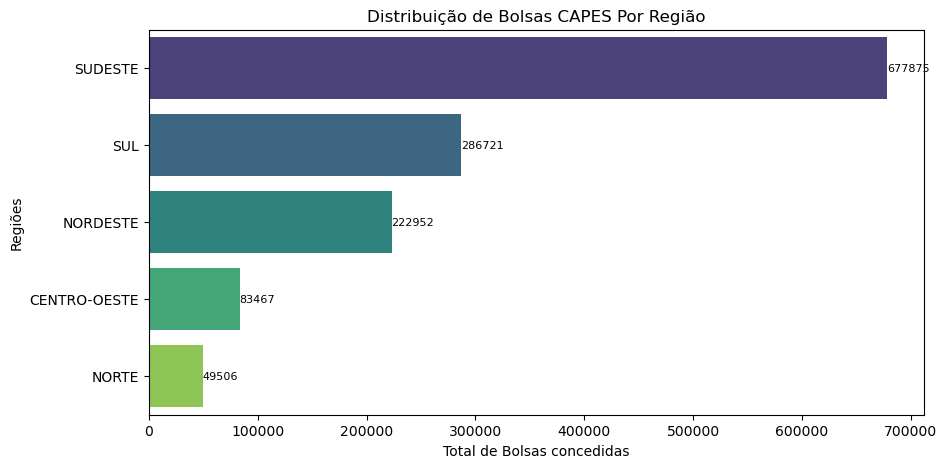

In [62]:
df = dados.groupby('Regiao')['Total'].sum().reset_index().sort_values('Total', ascending=False)
plt.figure(figsize=(10,5))
ax = sns.barplot(df, x='Total', y='Regiao', palette='viridis')
ax.bar_label(ax.containers[0], fontsize=8)
plt.xlabel('Total de Bolsas concedidas')
plt.ylabel('Regiões')
plt.title('Distribuição de Bolsas CAPES Por Região')
plt.show()

## 4. O status jurídico que disponibiliza o maior número de bolsas é o Federal

Foram encontrados dados que indicam que a maioria das bolsas destinadas a programas de mestrado, doutorado e pós-doutorado (60.8%) são concedidas pelo governo federal, seguidas pelas esferas estaduais (26.7%), privadas (12.3%) e municipais (0.2%).

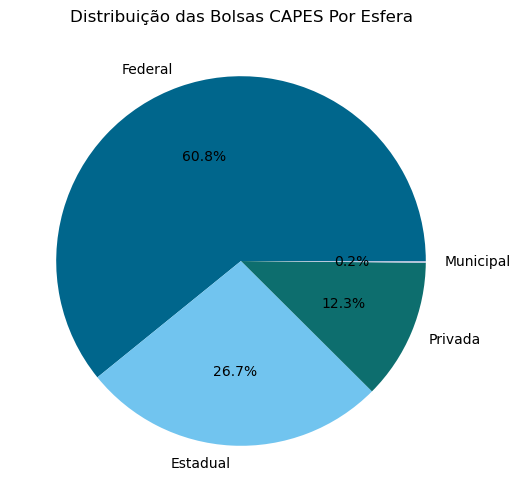

In [63]:
df = dados.groupby('Tipo')['Total'].sum().reset_index().sort_values('Total', ascending=False)
plt.figure(figsize=(12,6))
plt.pie(df['Total'], labels=df['Tipo'], autopct='%1.1f%%', colors=['#00668c', '#71c4ef', '#0D6E6E', '#b4c2dc'])
plt.title('Distribuição das Bolsas CAPES Por Esfera')
plt.show()

### 5. Pesquisas relacionadas à ciências humanas recebem mais concessão de bolsas?

### 6. A quantidade de bolsas diminui conforme aumenta o nível acadêmico?

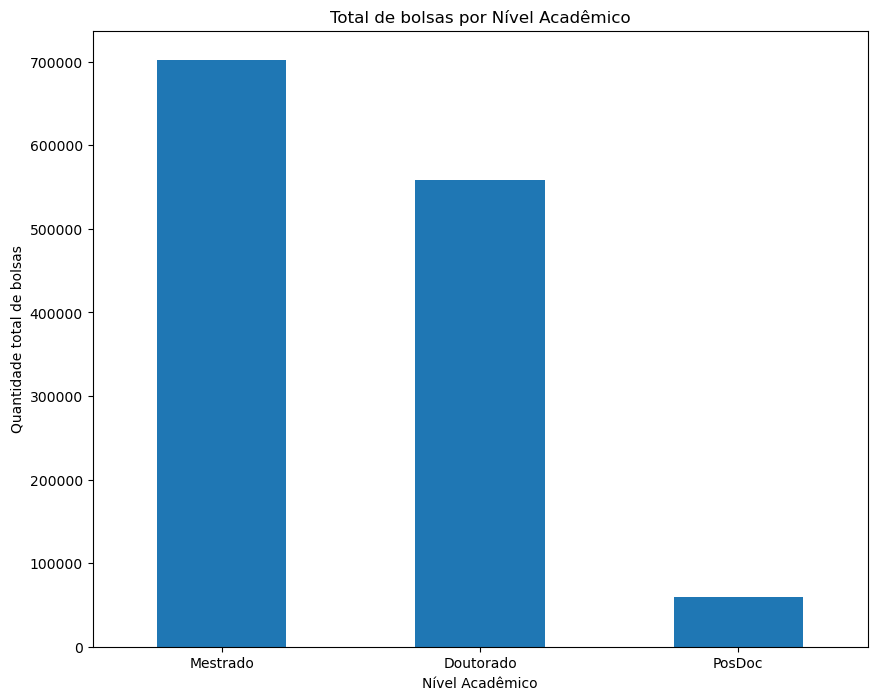

In [64]:
df =dados[['Mestrado', 'Doutorado', 'PosDoc']].sum()

plt.figure(figsize=(10, 8))
df.plot(kind='bar')
plt.title('Total de bolsas por Nível Acadêmico')
plt.xlabel('Nível Acadêmico')
plt.ylabel('Quantidade total de bolsas')
plt.xticks(rotation=0)
plt.show()

### 7. No período analisado, a área com maior quantidade de bolsas se manteve durante os anos?

### 8. A quantidade de bolsas para Mestrado são maiores que para Doutorado e Pós-Doutorado

Verifica-se que aproximadamente 55.7% das bolsas são designadas para Mestrado, enquanto 44.3% são destinadas ao Doutorado e 4.5% são alocadas para Pós-Doutorado. Isso evidencia uma diminuição na quantidade de bolsas à medida que o nível de complexidade e formação aumenta.

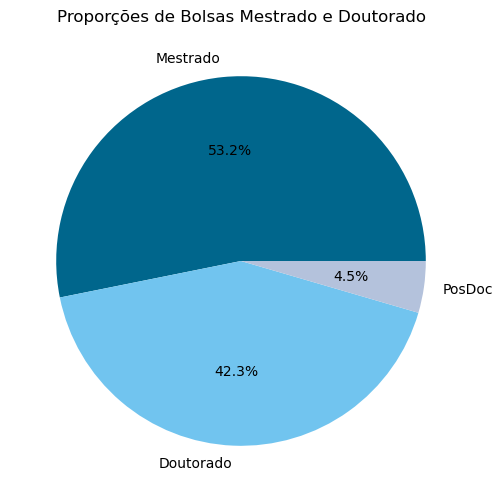

In [65]:
plt.figure(figsize=(12,6))
dados[['Mestrado','Doutorado', 'PosDoc']].sum().plot.pie(autopct='%1.1f%%', colors=['#00668c', '#71c4ef', '#b4c2dc'])
plt.title('Proporções de Bolsas Mestrado e Doutorado')
plt.show()

## Conclusão